<a href="https://colab.research.google.com/github/nhlong1512/IS252.N21/blob/main/Lab3_Class_KTDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


In [2]:
#import file csv
df_training = pd.read_csv("adult.data.csv")
df_test = pd.read_csv("adult.test.csv")


In [15]:
# Xóa các hàng có dấu "?"
df = df_training[df_training != '?'].dropna()

In [19]:
# Xóa các hàng có dấu "?"
df = df_test[df_test != '?'].dropna()

In [ ]:
# xóa cột fnlwgt
df_training = df_training.drop('fnlwgt', axis=1)

# in ra 5 dòng đầu tiên của dữ liệu huấn luyện sau khi xóa cột fnlwgt
print(df_training.head(5))

In [21]:
count_training = len(df_training.index)


In [22]:
count_test = len(df_test.index)

In [23]:
print(count_training)
print(count_test)

32561
16281


In [29]:
data = pd.concat([df_training, df_test], axis=0)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  income          48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.6+ MB


<ipython-input-33-1f9a8d8c84d8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='pearson'), annot = True)


<Axes: >

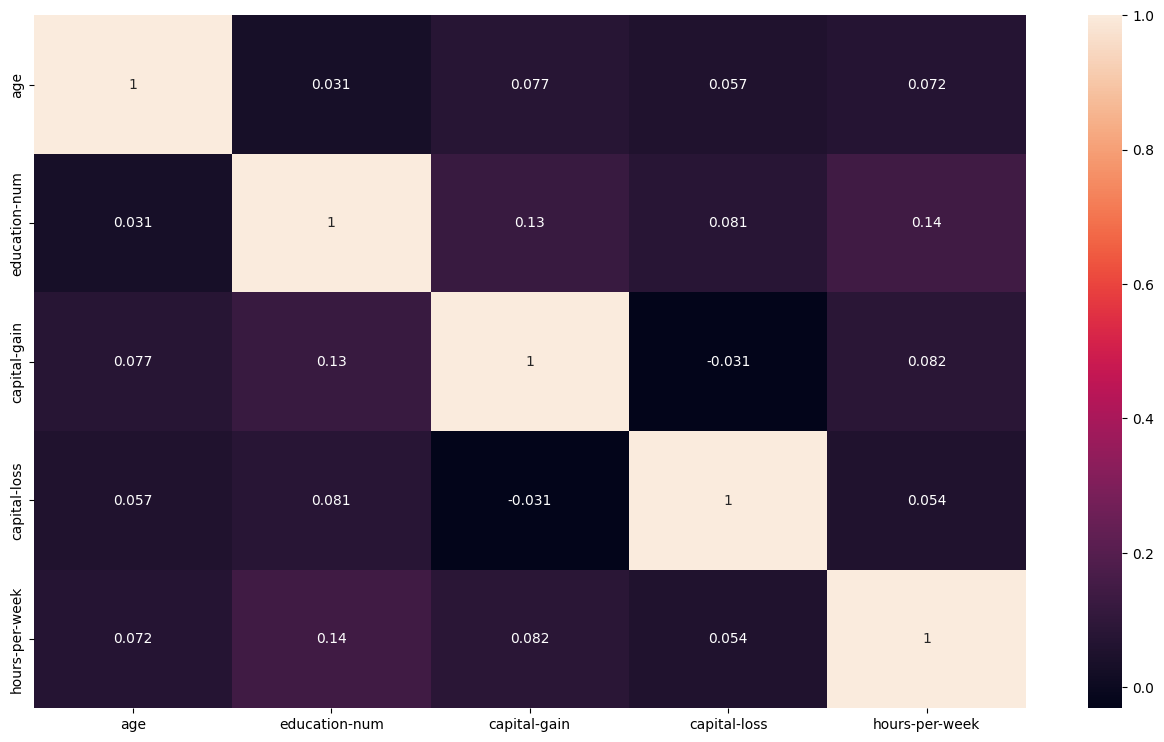

In [33]:
#3
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(method='pearson'), annot = True)

In [35]:
#4
features = data.drop('income', axis = 1)
labels = data['income']

In [36]:
#5
features.select_dtypes(exclude=['int64']).columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [37]:
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onehot

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,13,0,0,36,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16277,64,9,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16278,38,13,0,0,50,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16279,44,13,5455,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [38]:
#6
X_train = features_onehot[:32561]
X_test = features_onehot[32561:]
y_train = labels[:32561]
y_test = labels[32561:]

In [40]:
#7
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
#Train Decision Tree Classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
#Predict the response for test dataset
tree_pred = clf.predict(X_test)
#Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy", tree_score)
print("Report", metrics.classification_report(y_test, tree_pred))

Accuracy 0.8227995823352374
Report               precision    recall  f1-score   support

       <=50K       0.88      0.89      0.88     12435
        >50K       0.63      0.60      0.62      3846

    accuracy                           0.82     16281
   macro avg       0.75      0.75      0.75     16281
weighted avg       0.82      0.82      0.82     16281



In [42]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.8227995823352374')

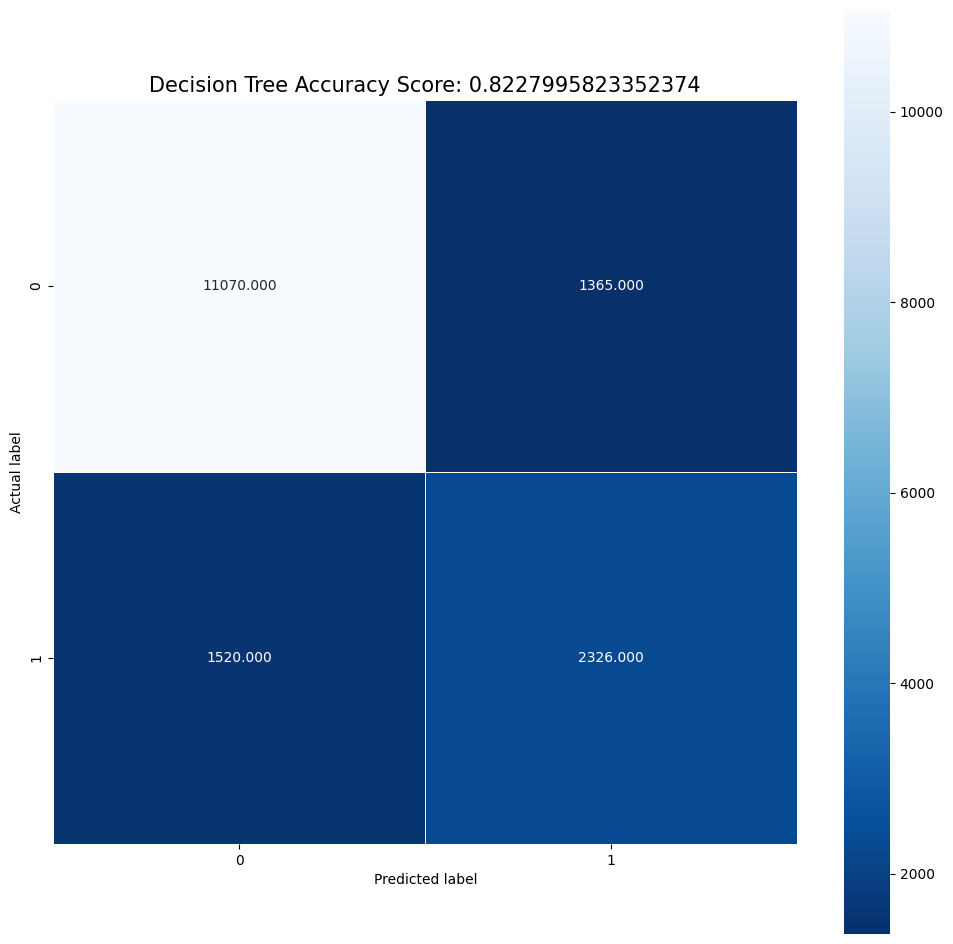

In [43]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square= True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size = 15)